# Aufgabe 2

## Importe

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from mlxtend.data import loadlocal_mnist

# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

## Variabeln

In [11]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## Dataset

In [12]:
# Grab the MNIST dataset, it has already training and testing data
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the ffnn
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [13]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
[5 0 4 ... 5 6 8]


### Encode data

In [14]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## a) Model

In [15]:
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"] 
# softmax and exponential activation functions are not working in this setup therefore they are not included in this list

In [16]:
# define the cnn (Conv, Conv, Flatten, Output) with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation=ac, input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation=ac))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


In [17]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
        metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
        epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 29s 62ms/step - loss: 0.7720 - accuracy: 0.7952 - val_loss: 0.3187 - val_accuracy: 0.9095
Epoch 2/20
469/469 [==============================] - 29s 61ms/step - loss: 0.3337 - accuracy: 0.9032 - val_loss: 0.2954 - val_accuracy: 0.9161
Epoch 3/20
469/469 [==============================] - 29s 62ms/step - loss: 0.3084 - accuracy: 0.9115 - val_loss: 0.2759 - val_accuracy: 0.9201
Epoch 4/20
469/469 [==============================] - 31s 66ms/step - loss: 0.2879 - accuracy: 0.9165 - val_loss: 0.2696 - val_accuracy: 0.9230
Epoch 5/20
469/469 [==============================] - 30s 64ms/step - loss: 0.2673 - accuracy: 0.9241 - val_loss: 0.2465 - val_accuracy: 0.9280
Epoch 6/20
469/469 [==============================] - 29s 63ms/step - loss: 0.2430 - accuracy: 0.9314 - val_loss: 0.2180 - val_accuracy: 0.9370
Epoch 7/20
469/469 [==============================] - 29s 63ms/step - loss: 0.21

## b) Evaluation

In [18]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    # plot the training loss

    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



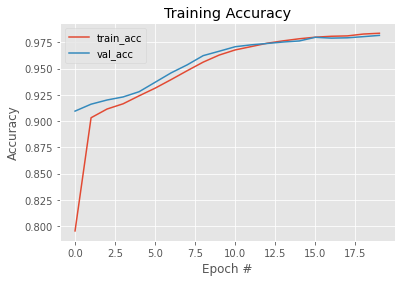

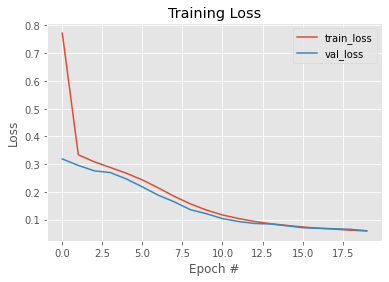


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.90      0.91      1032
           3       0.88      0.93      0.90      1010
           4       0.93      0.91      0.92       982
           5       0.93      0.85      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.90      0.92      1028
           8       0.92      0.88      0.90       974
           9       0.86      0.92      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



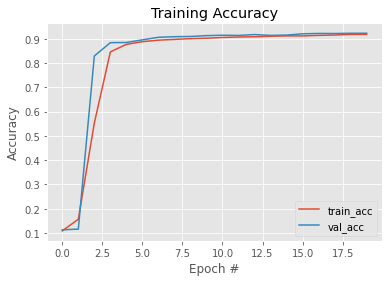

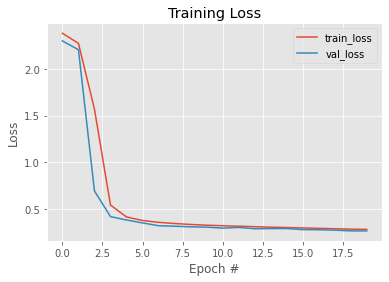


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



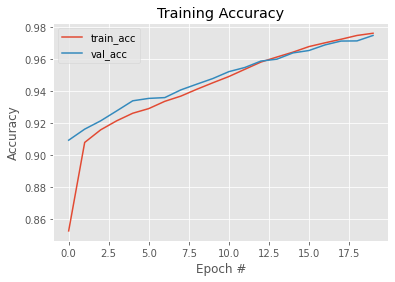

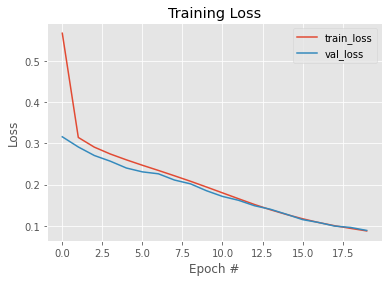


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.91      0.92       892
           6       0.97      0.94      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.89      0.95      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



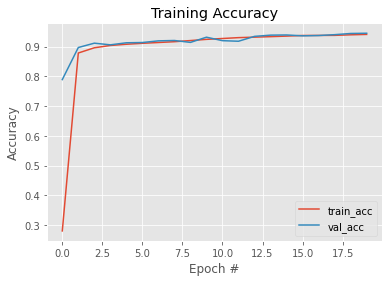

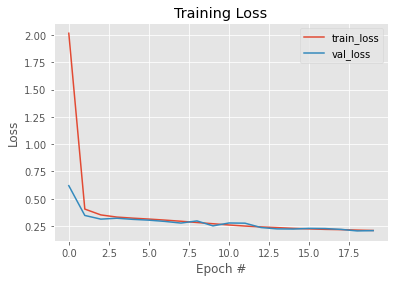


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.92      0.94      1032
           3       0.92      0.96      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.92      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



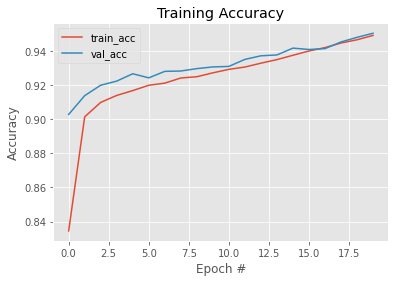

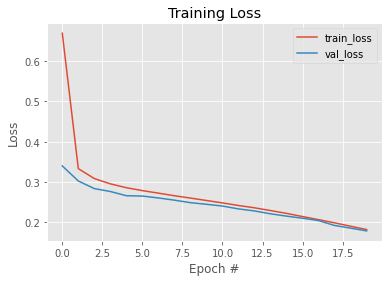


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



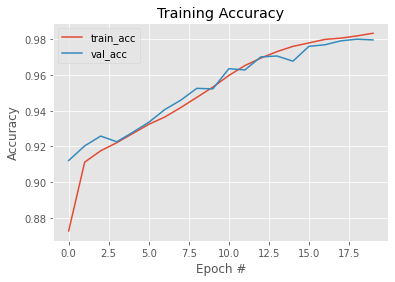

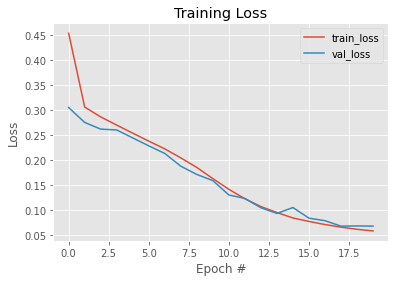


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



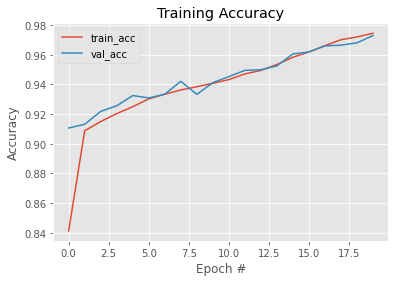

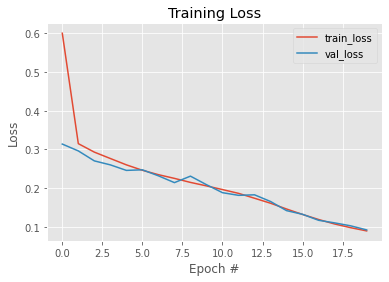

In [19]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
	    predictions.argmax(axis=1),
	    target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)